## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ <span style="color: red;">10</span>

In [1]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

class DecisionTree(BaseEstimator):#, ClassifierMixin):
    def __init__(self, feature_types):#, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        self.feature_types = feature_types
#         if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
#             raise ValueError("There is unknown feature type")
    #训练模型
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)#用于构建决策树的节点，self._tree 根节点

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

clf = DecisionTree(feature_types=['real'] * 5)
clf

DecisionTree(feature_types=['real', 'real', 'real', 'real', 'real'])

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [10]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),#生成一个圆形数据集，其中包含两个类别的数据点，形成内外两个圆环。
    make_moons(noise=0.2, random_state=42),#生成两个互连的月牙形数据集。
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [11]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

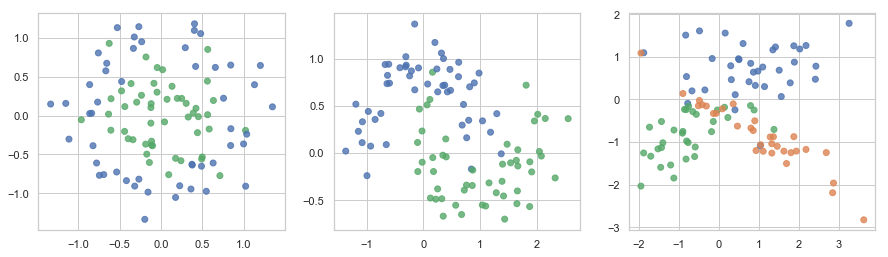

In [12]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [3]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

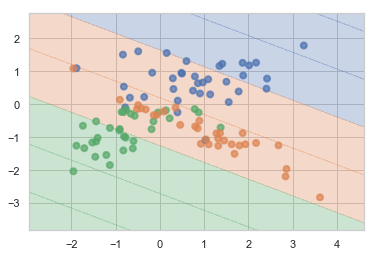

In [14]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [14]:
from sklearn.datasets import make_classification

# 生成示例数据集
datasets = [
    make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42),
    make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=43),
    make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=44)
]

Dataset 1 - Train Accuracy: 1.0000, Test Accuracy: 0.9667


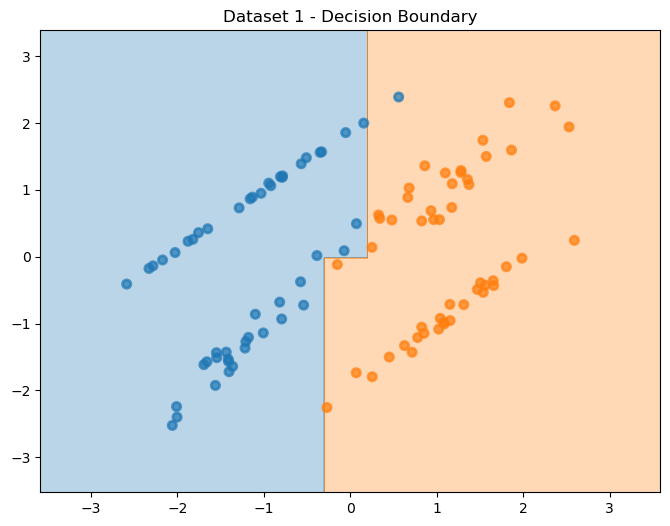

Dataset 2 - Train Accuracy: 1.0000, Test Accuracy: 0.8000


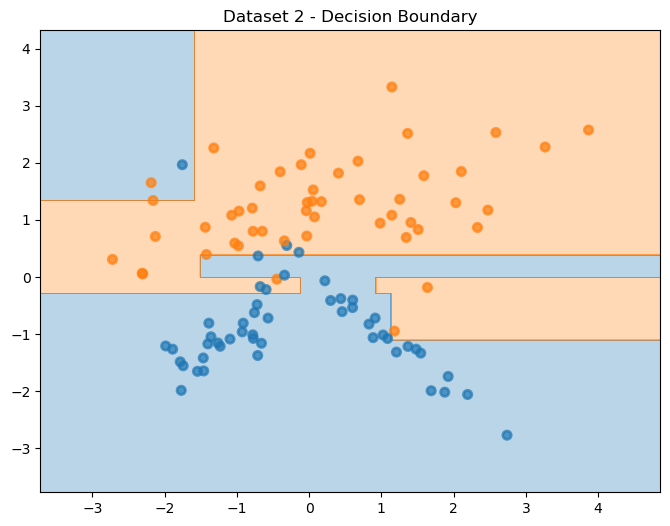

Dataset 3 - Train Accuracy: 1.0000, Test Accuracy: 0.6667


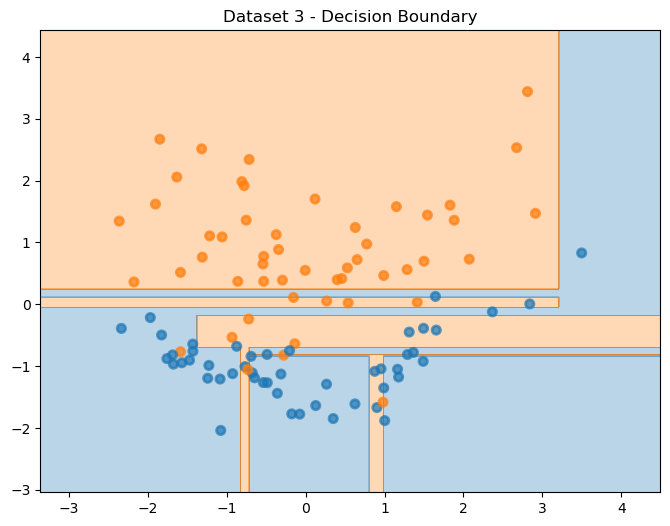

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# 遍历每个数据集
for i, (X, y) in enumerate(datasets):
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 训练决策树模型
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # 预测
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # 计算准确率
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # 打印准确率
    print(f"Dataset {i+1} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    
    # 绘制决策边界
    plt.figure(figsize=(8, 6))
    plot_surface(clf, X, y)
    plt.title(f'Dataset {i+1} - Decision Boundary')
    plt.show()

__Ответ:__ Для трех разных наборов данных (Набор данных 1, Набор данных 2, Набор данных 3) точность дерева решений на обучающем наборе составляет 1,0000,что означает, что модель отлично работает с обучающими данными и может совершенно правильно классифицировать все обучающие выборки.Однако производительность на тестовом наборе различна.По мере увеличения количества наборов данных точность теста постепенно снижается (0,9667, 0,8000 и 0,6667 соответственно).Это явление обычно указывает на проблему переобучения.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Dataset 1 - max_depth=1, min_samples_leaf=1 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=1, min_samples_leaf=2 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=1, min_samples_leaf=5 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=1, min_samples_leaf=10 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=1, min_samples_leaf=20 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=2, min_samples_leaf=1 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=2, min_samples_leaf=2 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=2, min_samples_leaf=5 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=2, min_samples_leaf=10 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=2, min_samples_leaf=20 - Train Accuracy: 0.9571, Test Accuracy: 0.9667
Dataset 1 - max_depth=3, min_samples_leaf=1 - Train Accuracy: 1.0000, Test A

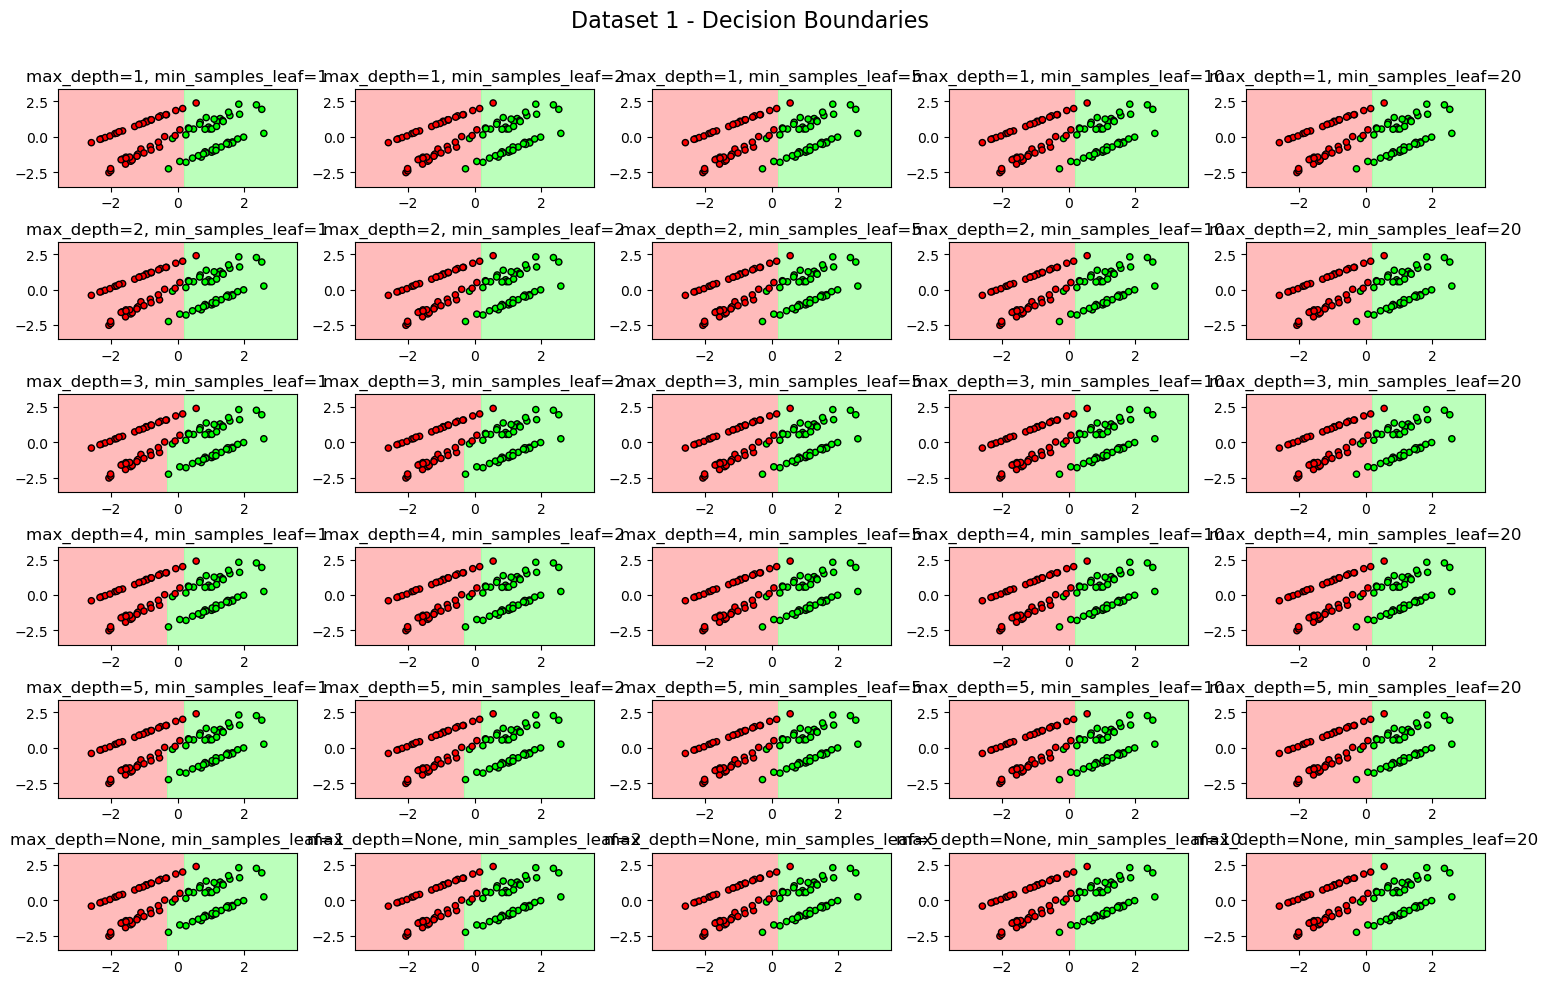

Dataset 2 - max_depth=1, min_samples_leaf=1 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=1, min_samples_leaf=2 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=1, min_samples_leaf=5 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=1, min_samples_leaf=10 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=1, min_samples_leaf=20 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=2, min_samples_leaf=1 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=2, min_samples_leaf=2 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=2, min_samples_leaf=5 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=2, min_samples_leaf=10 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=2, min_samples_leaf=20 - Train Accuracy: 0.9286, Test Accuracy: 0.8667
Dataset 2 - max_depth=3, min_samples_leaf=1 - Train Accuracy: 0.9571, Test A

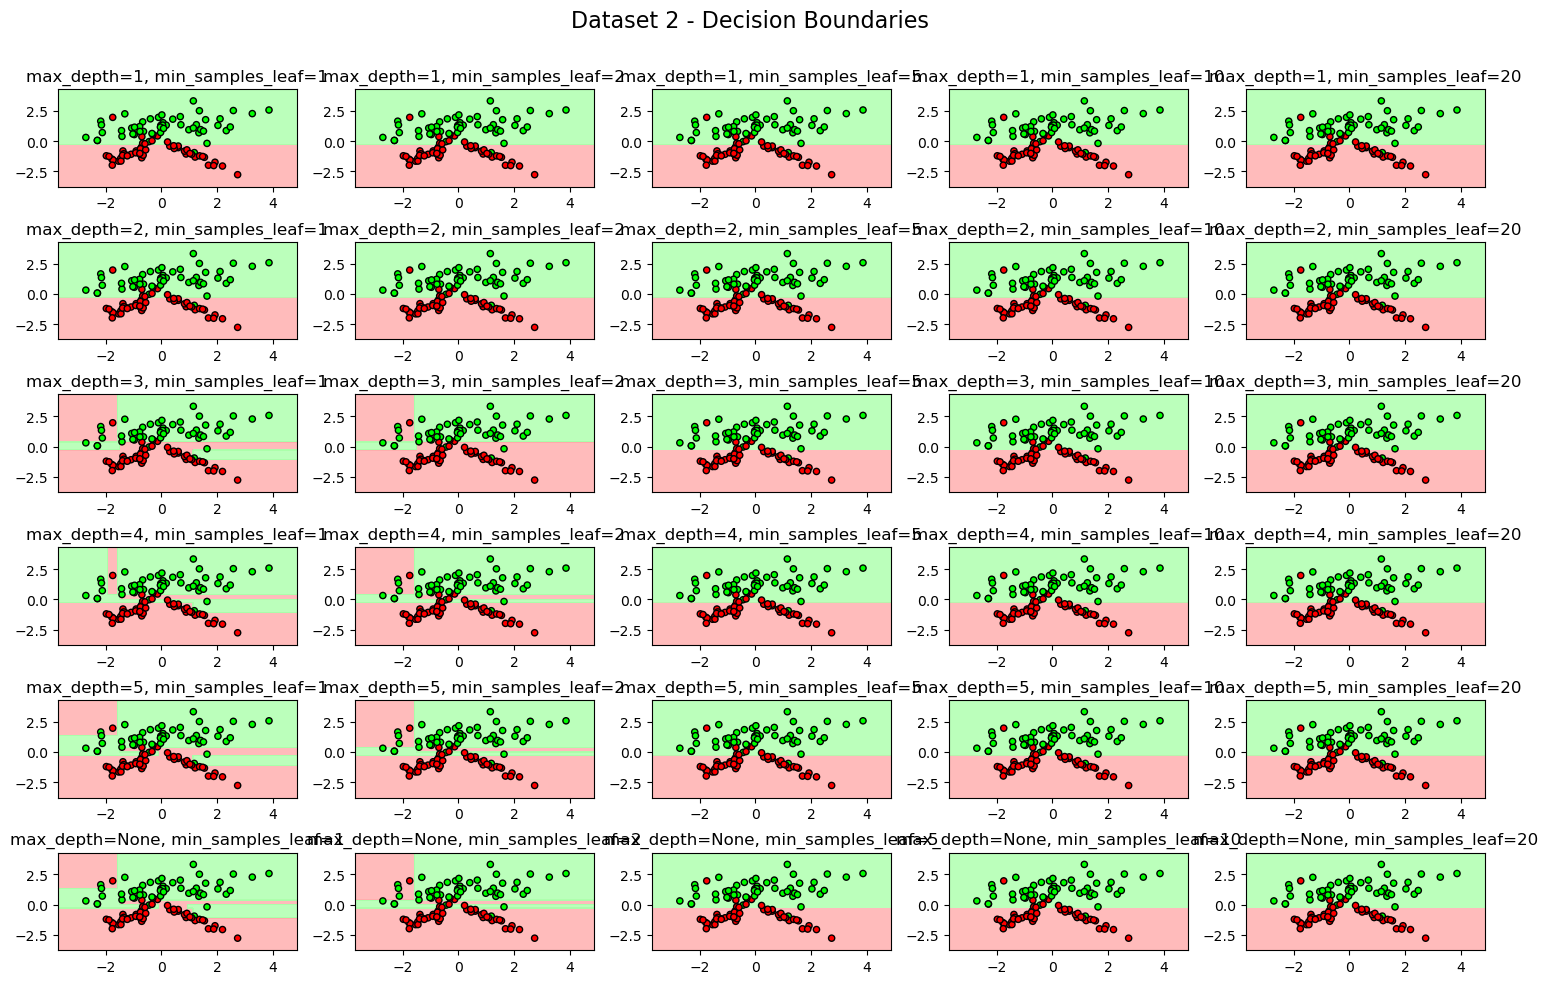

Dataset 3 - max_depth=1, min_samples_leaf=1 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=1, min_samples_leaf=2 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=1, min_samples_leaf=5 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=1, min_samples_leaf=10 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=1, min_samples_leaf=20 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=2, min_samples_leaf=1 - Train Accuracy: 0.9000, Test Accuracy: 0.9333
Dataset 3 - max_depth=2, min_samples_leaf=2 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=2, min_samples_leaf=5 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=2, min_samples_leaf=10 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=2, min_samples_leaf=20 - Train Accuracy: 0.8857, Test Accuracy: 0.9333
Dataset 3 - max_depth=3, min_samples_leaf=1 - Train Accuracy: 0.9286, Test A

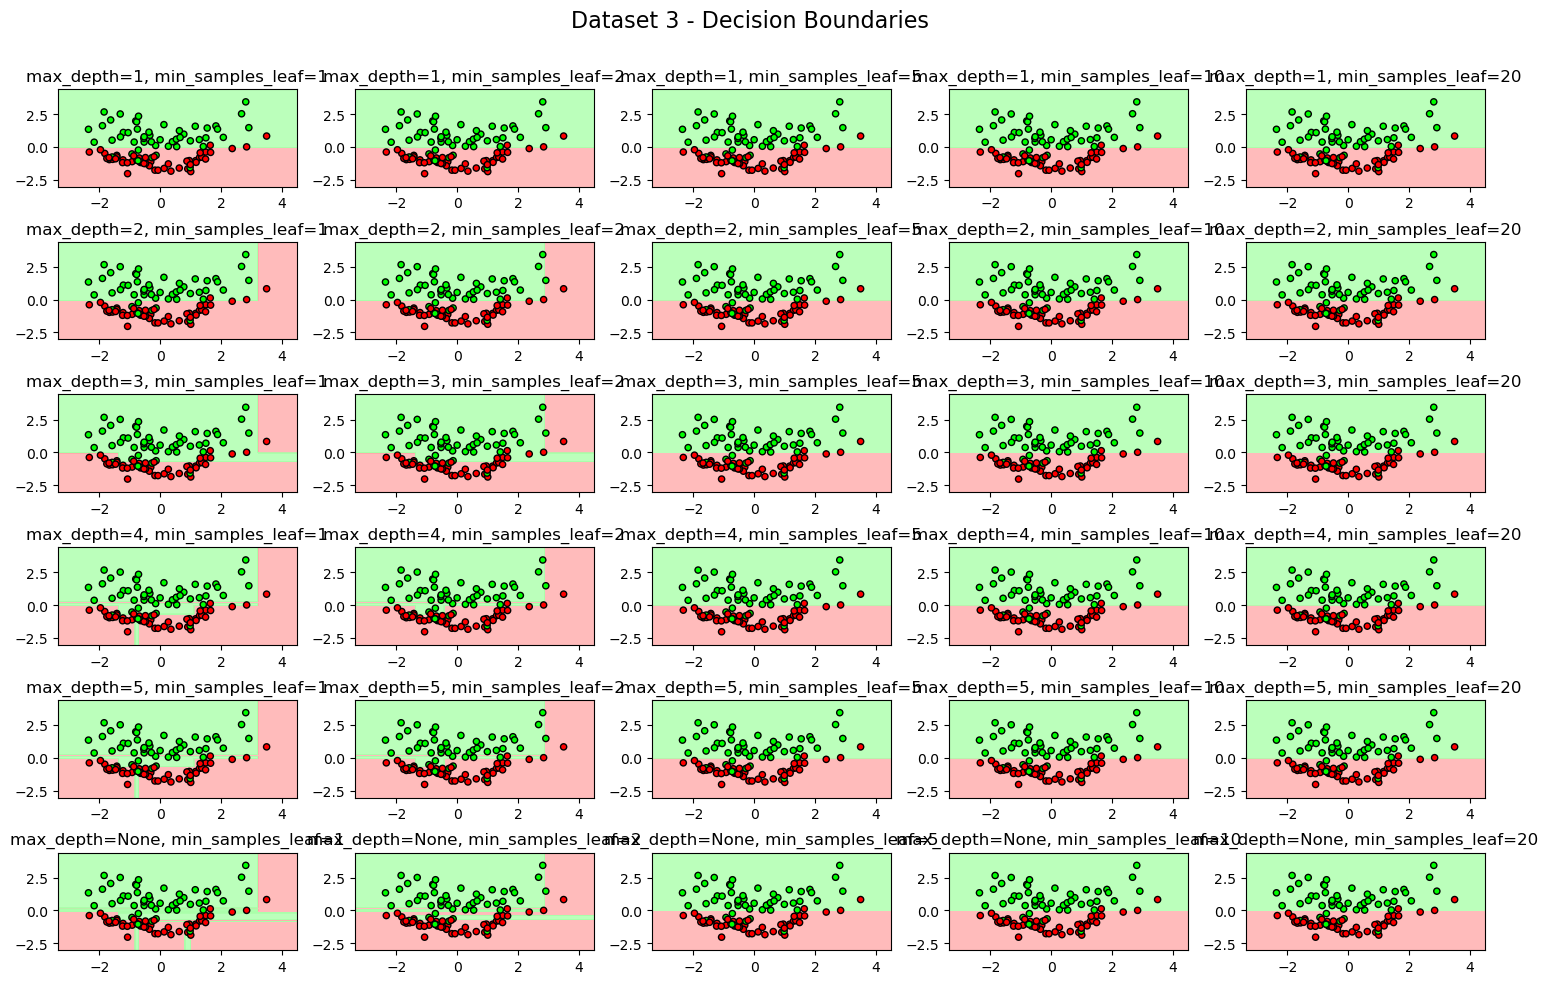

In [35]:
# 定义参数范围
max_depths = [1, 2, 3, 4, 5, None]
min_samples_leaves = [1, 2, 5, 10, 20]

# 定义绘图函数
def plot_surface(clf, X, y, ax):
    h = .02  # 步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# 遍历每个数据集
for i, (X, y) in enumerate(datasets):
    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # 创建一个图形对象
    fig, axes = plt.subplots(len(max_depths), len(min_samples_leaves), figsize=(15, 10))
    
    # 遍历不同的参数组合
    for j, max_depth in enumerate(max_depths):
        for k, min_samples_leaf in enumerate(min_samples_leaves):
            # 训练决策树模型
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            
            # 预测
            y_train_pred = clf.predict(X_train)
            y_test_pred = clf.predict(X_test)
            
            # 计算准确率
            train_accuracy = accuracy_score(y_train, y_train_pred)
            test_accuracy = accuracy_score(y_test, y_test_pred)
            
            # 打印准确率
            print(f"Dataset {i+1} - max_depth={max_depth}, min_samples_leaf={min_samples_leaf} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
            
            # 绘制决策边界
            ax = axes[j, k]
            plot_surface(clf, X, y, ax)
            ax.set_title(f'max_depth={max_depth}, min_samples_leaf={min_samples_leaf}')
    
    # 调整子图布局
    plt.tight_layout()
    plt.suptitle(f'Dataset {i+1} - Decision Boundaries', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

__Ответ:__ 
Когда max_depth меньше, глубина дерева решений меньше, а граница решений проще. Это часто приводит к недостаточной подгонке, когда модель плохо работает на обучающем наборе, но может работать относительно стабильно на тестовом наборе.
Когда max_depth больше, глубина дерева решений становится глубже, а граница решений становится более сложной. Это может привести к переобучению, когда модель очень хорошо работает на обучающем наборе, но плохо на тестовом наборе.
Когда min_samples_leaf мал, каждый листовой узел может содержать меньше выборок, что делает дерево решений более гибким и способным захватывать больше деталей, но также его легче переобучать.
Когда min_samples_leaf больше, каждый листовой узел должен содержать больше выборок, что делает дерево решений более гладким и снижает риск переобучения, но может привести к недостаточному подгонке.
По мере увеличения max_eep точность обучающего набора обычно улучшается, поскольку модель лучше соответствует обучающим данным.
Точность тестового набора может быть ниже, если max_eep мала, но по мере увеличения max_eep точность тестового набора может сначала увеличиваться, а затем уменьшаться, поскольку модель начинает переопределять обучающие данные.
1.Переобучение: когда модель слишком сложна (max_eep большой, min_samples_leaf мал), модель будет переопределять обучающие данные и изучать шум и детали в обучающих данных, что приведет к снижению производительности на тестовых данных.
2.
Недостаточная подгонка: если модель слишком проста (max_глубина мала, а min_samples_leaf велика), модель не может уловить сложные закономерности в данных, что приводит к низкой производительности как на обучающих, так и на тестовых данных.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


      0   0.1   0.2   0.3   0.4  0.5
0  0.08  0.08  0.10  0.24  0.90    1
1  0.06  0.06  0.05  0.25  0.33    0
2  0.10  0.10  0.15  0.65  0.30    1
3  0.08  0.08  0.08  0.98  0.24    0
4  0.09  0.15  0.40  0.10  0.66    1
Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5'], dtype='object')
(257, 6)
(257, 6)
Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5'], dtype='object')
(257, 6)
Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5'], dtype='object')


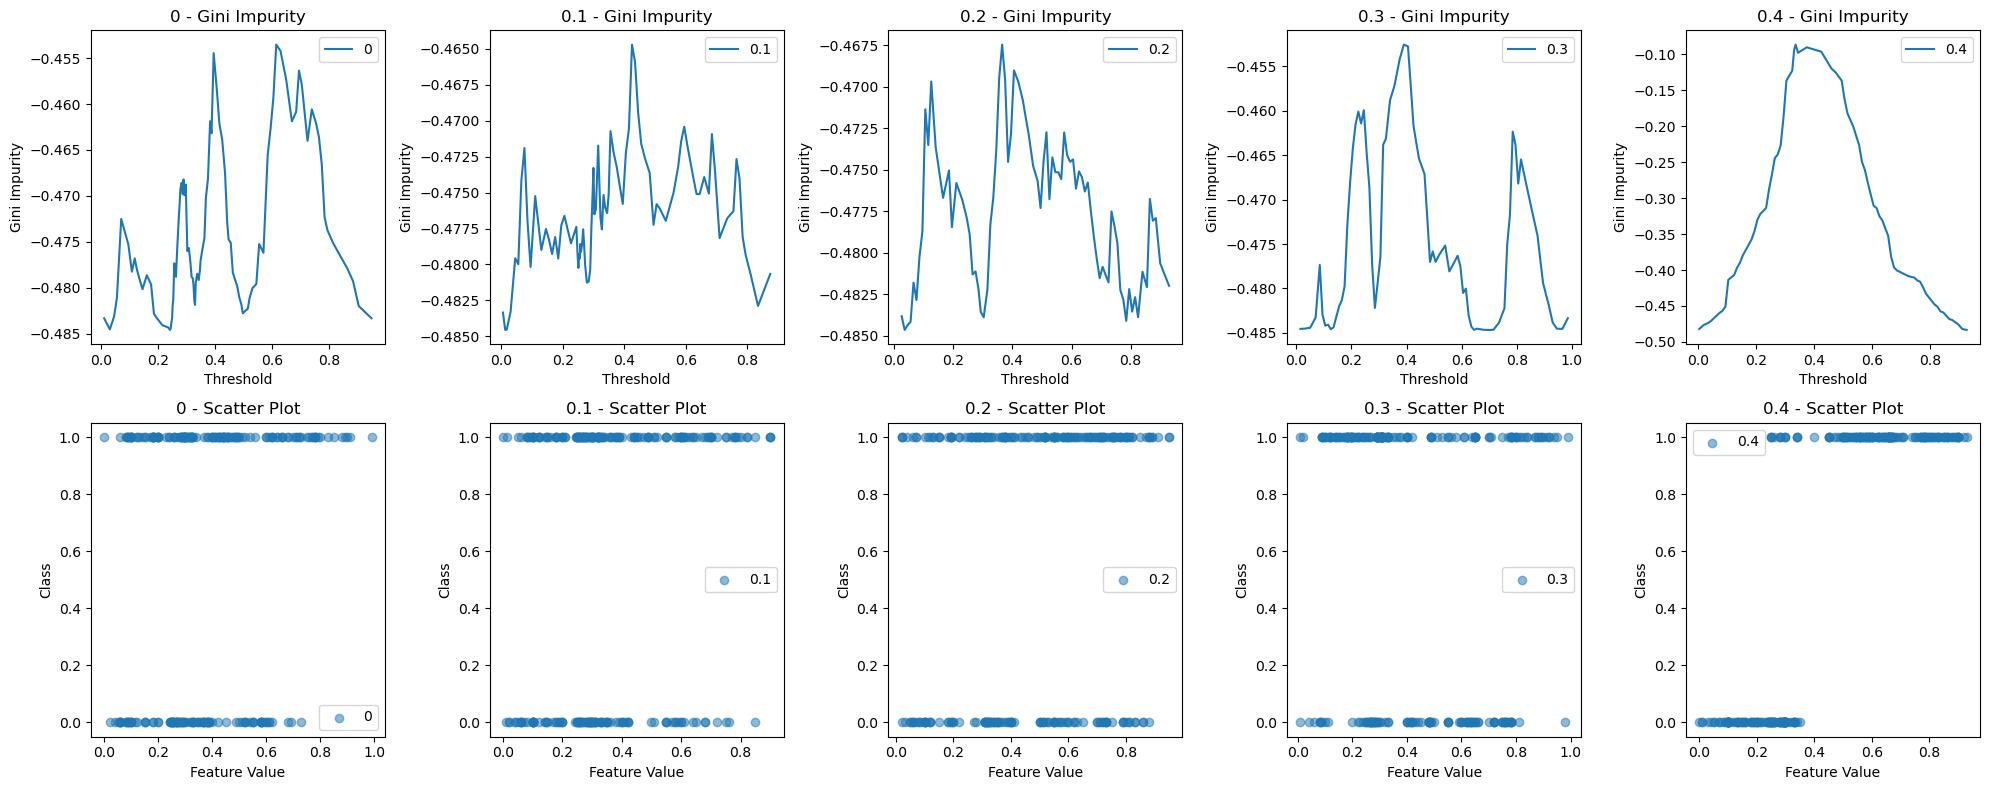

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 加载数据集
file_path = r'C:\Users\wangy\Downloads\homework-practice-05-Decision_tree\student_train.tsv'
data = pd.read_csv(file_path, sep='\t', skiprows=1)  # 使用制表符分隔符，并跳过第 0 行

# 查看数据集的前几行
print(data.head())

# 查看数据集的列名
print(data.columns)

# 查看数据集的形状
print(data.shape)

# 删除不必要的列
if 'Data Set Characteristics: Multivariate' in data.columns:
    data = data.drop(columns=['Data Set Characteristics: Multivariate'])
if 'Unnamed: 1' in data.columns:
    data = data.drop(columns=['Unnamed: 1'])

# 再次查看数据集的形状和列名
print(data.shape)
print(data.columns)

# 检查并处理非数值数据
for col in data.columns[:-1]:  # 不包括最后一列（目标变量）
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            print(f"Converted column {col} to numeric.")
        except ValueError:
            print(f"Column {col} contains non-numeric values and cannot be converted.")
            data = data.drop(columns=[col])
            print(f"Dropped column {col}.")

# 再次查看数据集的形状和列名
print(data.shape)
print(data.columns)

# 分离特征和目标变量
num_features = data.shape[1] - 1
features = data.iloc[:, :num_features].values
target = data.iloc[:, num_features].values

# 特征名称
feature_names = data.columns[:num_features]


# 创建一个图形对象
fig, axes = plt.subplots(2, num_features, figsize=(20, 8))

# 遍历每个特征
for i in range(num_features):
    # 计算吉尼不纯度
    thresholds, ginis, _, _ = find_best_split(features[:, i], target)
    
    # 绘制“分割点 - 吉尼不纯度”曲线
    axes[0, i].plot(thresholds, ginis, label=f'{feature_names[i]}')
    axes[0, i].set_title(f'{feature_names[i]} - Gini Impurity')
    axes[0, i].set_xlabel('Threshold')
    axes[0, i].set_ylabel('Gini Impurity')
    axes[0, i].legend()

    # 绘制“特征值 - 类别”散点图
    axes[1, i].scatter(features[:, i], target, alpha=0.5, label=f'{feature_names[i]}')
    axes[1, i].set_title(f'{feature_names[i]} - Scatter Plot')
    axes[1, i].set_xlabel('Feature Value')
    axes[1, i].set_ylabel('Class')
    axes[1, i].legend()

# 调整子图布局
plt.tight_layout()
plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** По кривой примеси Джини мы можем определить лучшие признаки и точки разделения, чтобы разделить выборку на два поддерева.Выбор наилучшего признака: в соответствии с кривой примеси Джини выберите признак с наименьшей примесью Джини в качестве наилучшего признака сегментации.
Визуальная оценка согласованности: проверьте диаграмму рассеяния. Если существует очевидная тенденция разделения между различными категориями точек на диаграмме рассеяния, это означает, что выбор кривой примесей Джини является разумным.
«Хорошая» характеристика кривой примесей Джини: при определенном пороге примеси Джини значительно падают и кривая имеет четкую впадину.
Кривая примесей Джини с «плохими» характеристиками: кривая относительно пологая, без явного минимума, а значение примесей Джини высокое.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from hw5code import DecisionTree

# 读取数据
file_path = r'C:\Users\wangy\Downloads\homework-practice-05-Decision_tree\mushroom\agaricus-lepiota.data'
data = pd.read_csv(file_path, header=None)

# 预处理数据
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# 分离特征和目标变量
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 定义特征类型
feature_types = ["categorical"] * X.shape[1]

# 创建并训练决策树
dt = DecisionTree(feature_types, max_depth=5, min_samples_split=2, min_samples_leaf=1)
dt.fit(X_train, y_train)

# 进行预测
y_pred = dt.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9973


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 定义数据集的URL和目标列
datasets = {
    'mushrooms': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
        'target_col': 0,
        'class_mapping': None
    },
    'cars': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',
        'target_col': -1,
        'class_mapping': {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
    },
    'nursery': {
        'url': 'https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data',
        'target_col': -1,
        'class_mapping': {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
    }
}

In [26]:
# 加载数据集
def load_dataset(url, target_col, class_mapping=None):
    df = pd.read_csv(url, header=None)
    if target_col == -1:
        target_col = df.columns[-1]
    X = df.drop(columns=target_col)
    y = df[target_col]
    
    if class_mapping:
        y = y.map(class_mapping)
    
    return X, y


In [28]:
# 数据预处理
def preprocess_data(X, y):
    # Label Encoding
    le = LabelEncoder()
    X_encoded = X.apply(le.fit_transform)
    
    # One-Hot Encoding
    ohe = OneHotEncoder()
    X_ohe = ohe.fit_transform(X).toarray()  # 使用 toarray() 转换为密集矩阵
    
    return X_encoded, X_ohe, y


In [30]:
# 模型训练和评估
def evaluate_models(X, y, X_ohe):
    models = {
        'DecisionTree (all features as real)': DecisionTreeClassifier(),
        'DecisionTree (all features as categorical)': DecisionTreeClassifier(),
        'DecisionTree (all features as real + one-hot encoding)': DecisionTreeClassifier()
    }
    
    results = {}
    
    for name, model in models.items():
        if 'one-hot' in name:
            scores = cross_val_score(model, X_ohe, y, cv=10, scoring=make_scorer(accuracy_score))
        else:
            scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(accuracy_score))
        
        results[name] = scores.mean()
    
    # Sklearn DecisionTreeClassifier
    sklearn_dt = DecisionTreeClassifier()
    sklearn_scores = cross_val_score(sklearn_dt, X, y, cv=10, scoring=make_scorer(accuracy_score))
    results['Sklearn DecisionTreeClassifier'] = sklearn_scores.mean()
    
    return results


In [32]:
# 主函数
def main():
    results_df = pd.DataFrame()

    for dataset_name, dataset_info in datasets.items():
        X, y = load_dataset(dataset_info['url'], dataset_info['target_col'], dataset_info['class_mapping'])
        X_encoded, X_ohe, y = preprocess_data(X, y)
        
        results = evaluate_models(X_encoded, y, X_ohe)
        results_df[dataset_name] = results.values()
    
    results_df.index = results.keys()
    print(results_df)

if __name__ == "__main__":
    main()

                                                    mushrooms      cars  \
DecisionTree (all features as real)                  0.961123  0.943285   
DecisionTree (all features as categorical)           0.956689  0.942707   
DecisionTree (all features as real + one-hot en...   0.968265  0.830142   
Sklearn DecisionTreeClassifier                       0.956689  0.942707   

                                                     nursery  
DecisionTree (all features as real)                 0.999691  
DecisionTree (all features as categorical)          0.999691  
DecisionTree (all features as real + one-hot en...  0.999691  
Sklearn DecisionTreeClassifier                      0.999691  


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Для анализа результатов эксперимента, давайте рассмотрим, как алгоритмы ранжируются на разных наборах данных.Большое количество признаков может привести к переобучению, особенно для сложных моделей.
Меньшее количество признаков может упростить модель и улучшить ее обобщающую способностьУлучшение работы алгоритмов
Предобработка данных:
Нормализация или стандартизация числовых признаков.
Кодирование категориальных признаков (например, one-hot encoding).
Гиперпараметры:
Подбор оптимальных гиперпараметров с помощью методов, таких как grid search или random search.
Регуляризация:
Использование регуляризации для предотвращения переобучения.
Ансамблирование:
Использование ансамблевых методов, таких как бэггинг, бустинг или стекинг, для улучшения обобщающей способности моделей..